# Checkpoint 24.5: Challenge

# Assignment

1. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

2. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. 

3. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-1" data-toc-modified-id="Part-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part 1</a></span></li><li><span><a href="#Part-2" data-toc-modified-id="Part-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Part 2</a></span><ul class="toc-item"><li><span><a href="#Creating-models" data-toc-modified-id="Creating-models-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Creating models</a></span></li><li><span><a href="#Initial-accuracy-comparision" data-toc-modified-id="Initial-accuracy-comparision-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Initial accuracy comparision</a></span></li></ul></li><li><span><a href="#Creating-other-data" data-toc-modified-id="Creating-other-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Creating other data</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import statsmodels.api as sm
import re

%matplotlib inline

## Part 1

We're going to load the [Boston house prices](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) data that comes with pre-installed with sklearn. 

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(data = boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
Y = pd.DataFrame(data = boston.target, columns=['MEDV'])
Y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Part 2

In [4]:
from sklearn.preprocessing import normalize

X_subset = normalize(X)
X_subset = pd.DataFrame(X, columns=X.columns)
X_subset = sm.add_constant(X_subset)

X_subset.head()

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=13)


X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((379, 13), (127, 13), (379, 1), (127, 1))

### Creating models

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsRegressor

alphas = [(10**e)/2 for e in np.arange(0, 10)]

ln = LinearRegression()
ln.fit(X_train, Y_train)

rcv = RidgeCV(alphas=alphas)
rcv.fit(X_train, Y_train)

lcv = LassoCV(alphas=alphas, cv=5, random_state = 13)
lcv.fit(X_train, Y_train)

knns = [KNeighborsRegressor(n_neighbors=n) for n in range(1, 25)]
knns = [knn.fit(X_train, Y_train) for knn in knns]

knn_ws = [KNeighborsRegressor(n_neighbors=n, weights='distance') for n in range(1, 25)]
knn_ws = [knn_w.fit(X_train, Y_train) for knn_w in knn_ws]

models = [ln, rcv, lcv, knns, knn_ws]

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Initial accuracy comparision

In [7]:
def check_scores(models, X_train, X_test, Y_train, Y_test):

    if isinstance(models, list) is False:
        models = [models]

    model_name = re.match('^[^\(]+', str(models[0]))[0]
    
    training_scores, test_scores = {}, {}

    for m in models:
        Y_train_pred = m.predict(X_train)
        training_scores[m] = m.score(X_train, Y_train)
        Y_test_pred = m.predict(X_test)
        test_scores[m] =  m.score(X_test, Y_test)
        
    best_model = max(test_scores, key = test_scores.get)
    print(best_model, training_scores[best_model], test_scores[best_model], '\n')
    
    Y_train_pred_best = best_model.predict(X_train)
    Y_test_pred_best = best_model.predict(X_test)
    
    plt.figure(figsize =(15, 5))
    plt.plot(Y_train, Y_train, color = 'red', label = 'Y-actual = Y-actual line')
    plt.plot(Y_test, Y_test, color = 'red')
    plt.scatter(Y_train, Y_train_pred_best, color = 'orange', label = 'training data', alpha = 0.5)
    plt.scatter(Y_test, Y_test_pred_best, color = 'blue', label = 'test data', alpha = 0.5)
    plt.grid()
    plt.title('Y-actual vs Y-predicted for the best performing {} model'.format(model_name))
    plt.legend()
    plt.show() 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 0.7445495716932606 0.7121928806832925 



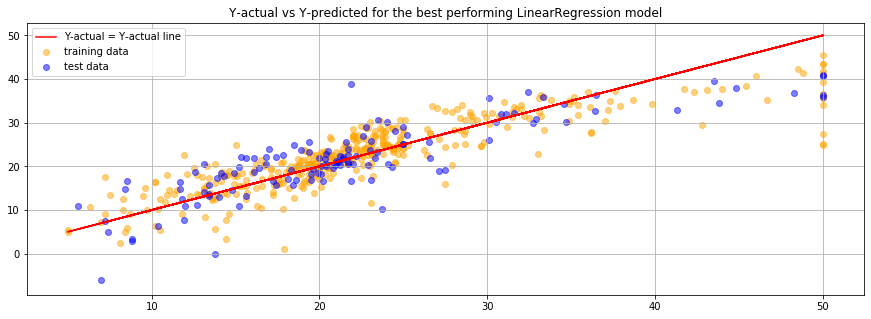

RidgeCV(alphas=array([5.e-01, 5.e+00, 5.e+01, 5.e+02, 5.e+03, 5.e+04, 5.e+05, 5.e+06,
       5.e+07, 5.e+08]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False) 0.7440492070705315 0.705373115011638 



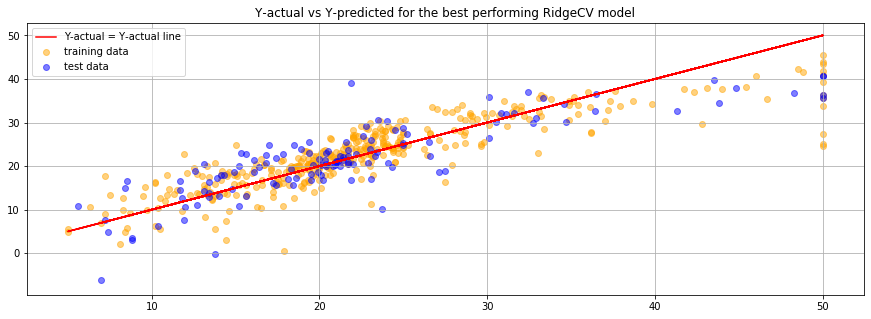

LassoCV(alphas=[0.5, 5.0, 50.0, 500.0, 5000.0, 50000.0, 500000.0, 5000000.0,
                50000000.0, 500000000.0],
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=13, selection='cyclic', tol=0.0001,
        verbose=False) 0.7189700520025565 0.6825645127352119 



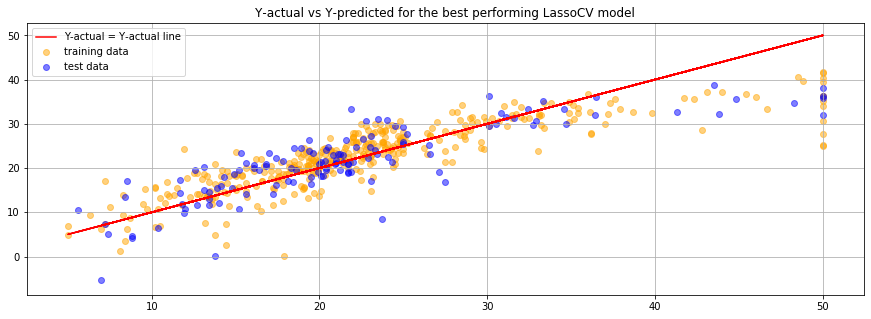

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform') 0.7979155379609867 0.3762986533189676 



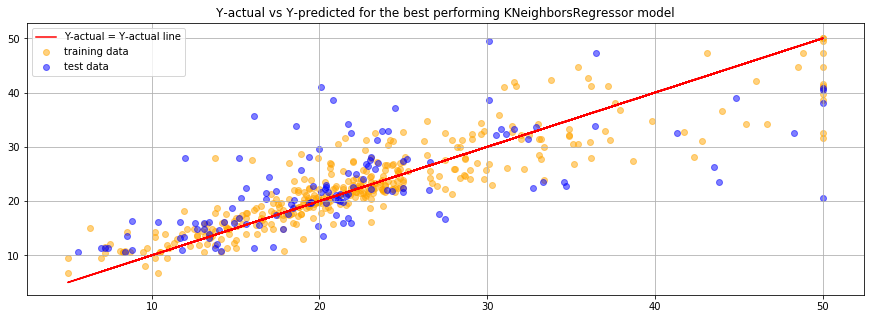

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                    weights='distance') 1.0 0.43927306451110837 



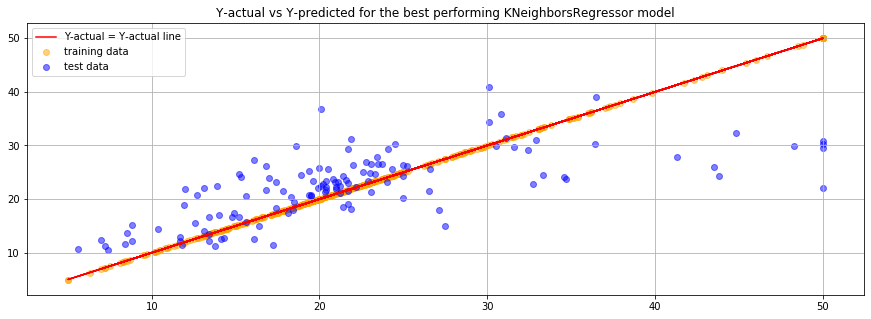

In [8]:
for m in models:
    check_scores(m, X_train, X_test, Y_train, Y_test)

It appears that the KNN models tend to highly overfit on the training data, and largely poor test data performance. 

The best performing model is actually the unregularized linear regression model, with a test score performance of 0.713.

## Creating other data

I did some reading online about the differences and it seems that KNN performs best when the function is non-parameterised, or the the x-variables are not related to the target variable in a simple or linear way. This often happens in functions that are graphically represented as a pattern of sorts. 

We'll create an example to demonstrate this.

In [9]:
X_wavy = [np.sin(x) * x for x in np.linspace(0, 1000)]
Y_wavy = [np.floor(np.cos(y)**2 * y**2) for y in np.linspace(0, 1000)]

data_wavy = pd.DataFrame(X_wavy, columns=['X_wavy'])
data_wavy['X'] = [x for x in np.linspace(0, 1000)]
data_wavy['Y_wavy'] = Y_wavy
data_wavy = sm.add_constant(data_wavy)

data_wavy.head()

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,X_wavy,X,Y_wavy
0,1.0,0.000000,0.000000,0.0
1,1.0,20.406647,20.408163,0.0
2,1.0,0.994920,40.816327,1664.0
3,1.0,-61.183561,61.224490,5.0
4,1.0,-3.978499,81.632653,6648.0


Relationship between x, x_wavy, and y_wavy


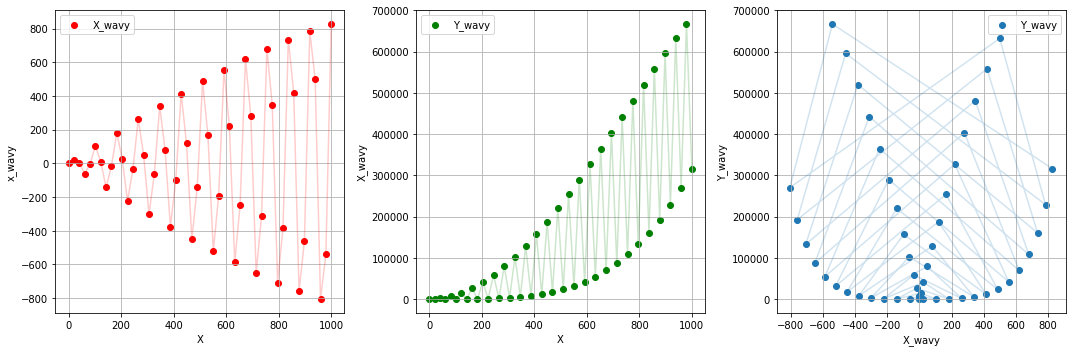

In [10]:
print("Relationship between x, x_wavy, and y_wavy")

plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.scatter(data_wavy['X'], data_wavy['X_wavy'], label = 'X_wavy', color = 'red')
plt.plot(data_wavy['X'], data_wavy['X_wavy'], color = 'red', alpha = 0.2)
plt.xlabel('X')
plt.ylabel('x_wavy')
plt.grid()
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(data_wavy['X'], data_wavy['Y_wavy'], label = 'Y_wavy', color = 'green')
plt.plot(data_wavy['X'], data_wavy['Y_wavy'], color = 'green', alpha = 0.2)
plt.xlabel('X')
plt.ylabel('X_wavy')
plt.legend()
plt.grid()

plt.subplot(1, 3, 3)
plt.scatter(data_wavy['X_wavy'], data_wavy['Y_wavy'], label = 'Y_wavy')
plt.plot(data_wavy['X_wavy'], data_wavy['Y_wavy'], alpha = 0.2)
plt.xlabel('X_wavy')
plt.ylabel('Y_wavy')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


We define our models, as usual. 

In [11]:
X_wavy = data_wavy[['const', 'X', 'X_wavy']]
Y_wavy = data_wavy[['Y_wavy']]

X_train_wavy, X_test_wavy, Y_train_wavy, Y_test_wavy = train_test_split(X_wavy, Y_wavy, test_size=.25, random_state=13)

ln_wavy = LinearRegression()
ln_wavy.fit(X_train_wavy, Y_train_wavy)

rcv_wavy = RidgeCV(alphas=alphas)
rcv_wavy.fit(X_train_wavy, Y_train_wavy)

lcv_wavy = LassoCV(alphas=alphas, cv=5, random_state = 13)
lcv_wavy.fit(X_train_wavy, Y_train_wavy)

knns_wavy = [KNeighborsRegressor(n_neighbors=n) for n in range(1, 25)]
knns_wavy = [knn.fit(X_train_wavy, Y_train_wavy) for knn in knns]

knn_ws_wavy = [KNeighborsRegressor(n_neighbors=n, weights='distance') for n in range(1, 25)]
knn_ws_wavy = [knn_w.fit(X_train_wavy, Y_train_wavy) for knn_w in knn_ws]

models_wavy = [ln_wavy, rcv_wavy, lcv_wavy, knns_wavy, knn_ws_wavy]

X_train_wavy.shape, X_test_wavy.shape, Y_train_wavy.shape, Y_test_wavy.shape

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


((37, 3), (13, 3), (37, 1), (13, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 0.605636146413734 0.29726705564806155 



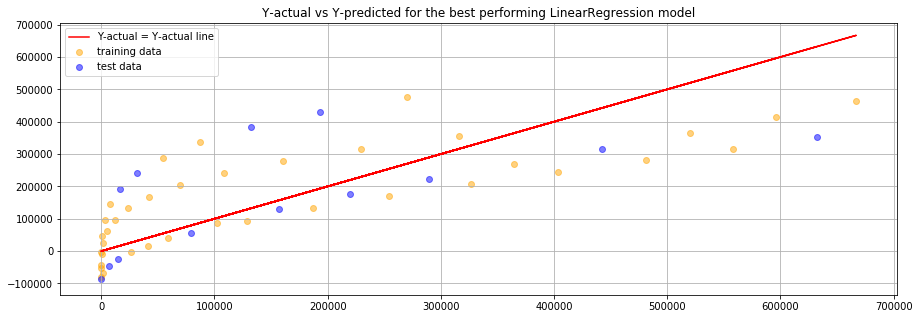

RidgeCV(alphas=array([5.e-01, 5.e+00, 5.e+01, 5.e+02, 5.e+03, 5.e+04, 5.e+05, 5.e+06,
       5.e+07, 5.e+08]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False) 0.6054899010700697 0.304310310451682 



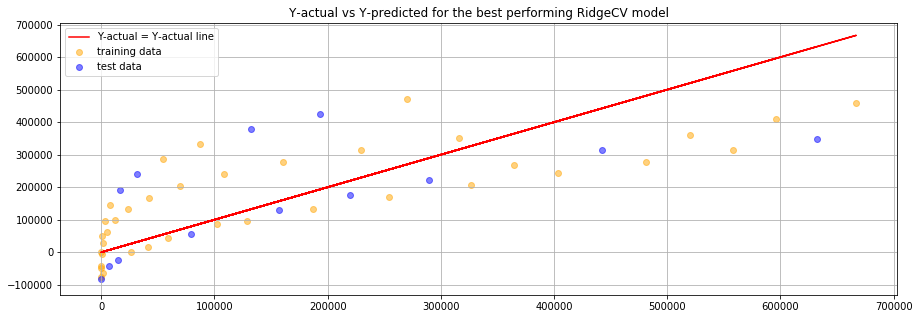

LassoCV(alphas=[0.5, 5.0, 50.0, 500.0, 5000.0, 50000.0, 500000.0, 5000000.0,
                50000000.0, 500000000.0],
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=13, selection='cyclic', tol=0.0001,
        verbose=False) 0.5932088187721988 0.40351640264241007 



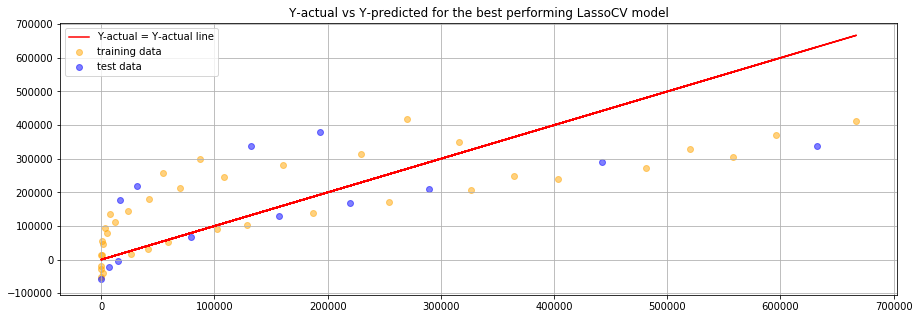

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform') 0.9537773564821439 0.923461091524869 



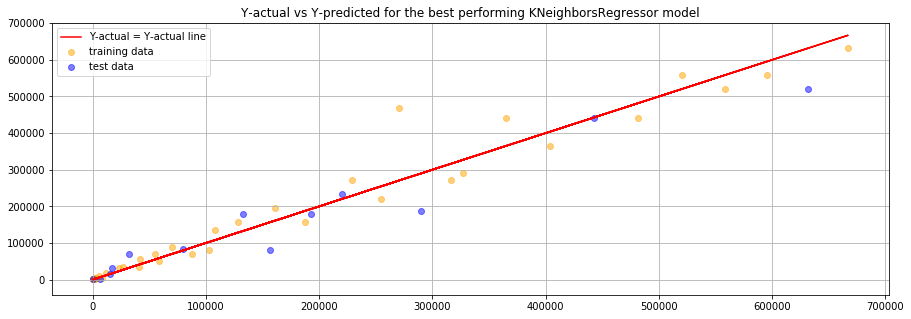

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='distance') 1.0 0.9605606905060186 



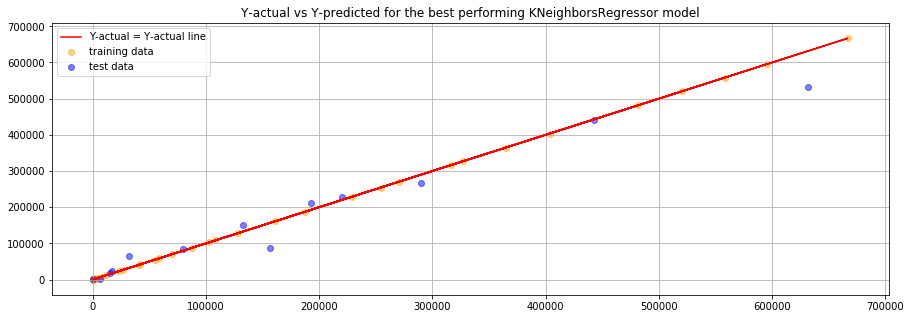

In [12]:
for m in models_wavy:
    check_scores(m, X_train_wavy, X_test_wavy, Y_train_wavy, Y_test_wavy)

Here, we clearly see that the KNN regressors perform extremely well when compared to the linear regression models. Moreover, the optimal n_neighbors in the KNN regressors is fairly low (=2), which implies that that the best performing model is hyper-specific. This is likely because of there is no noise in the functions, and as such, overfitting essentially captures the function in it entirety.